## Observations and Insights 

The larger the weight of the mouse, the least effective treatment. 
Capomulin and Ramicane appear to be more effective treatments.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# check variable names to find column to merge on
#mouse_metadata.head()
#study_results.head()

# Combine the data into a single dataset
mouse_study_combined = pd.merge(mouse_metadata, study_results, on ="Mouse ID", how="outer")

# Display the data table for preview
mouse_study_combined

# make dataframe
study_df = pd.DataFrame(mouse_study_combined)
study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice.
len(mouse_study_combined["Mouse ID"])



1893

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows = mouse_study_combined[mouse_study_combined.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_rows


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = mouse_study_combined.loc[mouse_study_combined['Mouse ID'] == "g989",:]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# this only removed the duplicates and not the full mouse.
#study_df_clean = mouse_study_combined.drop_duplicates(subset = ["Mouse ID","Timepoint"])
# can't get this to work
#study_df_clean = mouse_study_combined.drop(mouse_study_combined.loc[mouse_study_combined['Mouse ID'] == "g989",:]),axis = 0
# drop duplicates by index number
study_df_clean= mouse_study_combined.drop(
    [mouse_study_combined.index[908],mouse_study_combined.index[909],mouse_study_combined.index[910],mouse_study_combined.index[911],mouse_study_combined.index[912],
     mouse_study_combined.index[913],mouse_study_combined.index[914],mouse_study_combined.index[915],mouse_study_combined.index[916],
     mouse_study_combined.index[917],mouse_study_combined.index[918],mouse_study_combined.index[919],mouse_study_combined.index[920],
     mouse_study_combined.index[908]])
study_df_clean


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Checking the number of mice in the clean DataFrame.
len(study_df_clean["Mouse ID"])

1880

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
drug_group = study_df_clean.groupby('Drug Regimen')
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_mean = drug_group['Tumor Volume (mm3)'].mean()
tumor_median = drug_group['Tumor Volume (mm3)'].median()
tumor_variance = drug_group['Tumor Volume (mm3)'].var()
tumor_stdev = drug_group['Tumor Volume (mm3)'].std()
tumor_sem = drug_group['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.
summary_df = round(pd.DataFrame({'Mean': tumor_mean, 'Median': tumor_median,'Variance': tumor_variance,
                                   'Standard Deviation': tumor_stdev, 'SEM': tumor_sem}),2)

summary_df.head()



,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
print(summary_df)
# Using the aggregation method, produce the same summary statistics in a single line
print(round(drug_group["Tumor Volume (mm3)"].agg(["mean", "median", "var","std", "sem"]),2))


               Mean  Median  Variance  Standard Deviation   SEM
Drug Regimen                                                   
Capomulin     40.68   41.56     24.95                4.99  0.33
Ceftamin      52.59   51.78     39.29                6.27  0.47
Infubinol     52.88   51.82     43.13                6.57  0.49
Ketapril      55.24   53.70     68.55                8.28  0.60
Naftisol      54.33   52.51     66.17                8.13  0.60
Placebo       54.03   52.29     61.17                7.82  0.58
Propriva      52.32   50.45     43.85                6.62  0.54
Ramicane      40.22   40.67     23.49                4.85  0.32
Stelasyn      54.23   52.43     59.45                7.71  0.57
Zoniferol     53.24   51.82     48.53                6.97  0.52
               mean  median    var   std   sem
Drug Regimen                                  
Capomulin     40.68   41.56  24.95  4.99  0.33
Ceftamin      52.59   51.78  39.29  6.27  0.47
Infubinol     52.88   51.82  43.13  6.57  0.

## Bar and Pie Charts

Text(0.5, 1.0, 'Number of Timepoints for Each Treatment Regimen')

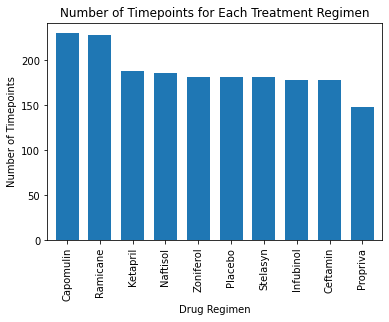

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
bar_plot = study_df_clean['Drug Regimen'].value_counts().plot.bar(width=0.7, zorder=3)
# Set labels for axes
bar_plot.set_xlabel("Drug Regimen")
bar_plot.set_ylabel("Number of Timepoints")
bar_plot.set_title("Number of Timepoints for Each Treatment Regimen")



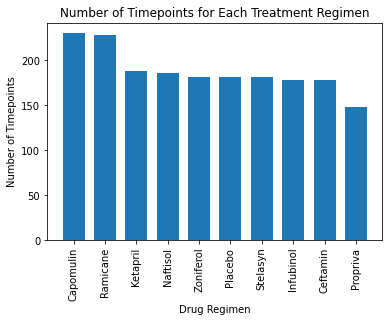

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
# y axis
counts = study_df_clean['Drug Regimen'].value_counts()
# x axis
x_axis = np.arange(len(counts))
plt.bar(x_axis, counts, width = 0.7, zorder=3)

# Label the tick marks 
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, counts.index.values)

# Rotate tick marks 90 degrees for visibility
plt.xticks(rotation=90)

# Set labels for axes
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.title('Number of Timepoints for Each Treatment Regimen')
plt.show()

Text(0, 0.5, '')

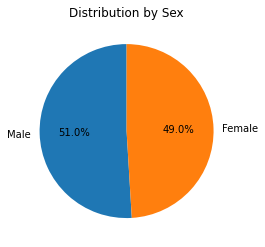

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Identify distribution of data by sex
sex = study_df_clean['Sex'].value_counts()

# Plot a pie chart filled with corresponding percentages and displayed vertically
pie_pd = sex.plot.pie(autopct="%1.1f%%", startangle=90, title='Distribution by Sex')

# Hide the 'y' label
pie_pd.set_ylabel('')

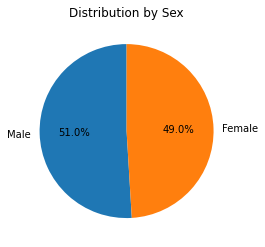

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex, labels=sex.index.values, autopct="%1.1f%%", startangle=90)
plt.title('Distribution by Sex')

# Display resulting plot
plt.show()


## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tp_df = pd.DataFrame(study_df_clean.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint': 'max_timepoint'})
max_tp_df
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_df = pd.merge(max_tp_df, study_df_clean, on ='Mouse ID')
tumor_df

,Mouse ID,max_timepoint,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b447,0,Ceftamin,Male,2,30,0,45.000000,0
1,x226,0,Ceftamin,Male,23,28,0,45.000000,0
2,f932,0,Ketapril,Male,15,29,0,45.000000,0
3,x336,0,Naftisol,Female,4,29,0,45.000000,0
4,l872,0,Placebo,Male,19,30,0,45.000000,0
...,...,...,...,...,...,...,...,...,...
1875,z969,45,Naftisol,Male,9,30,25,63.145652,2
1876,z969,45,Naftisol,Male,9,30,30,65.841013,3
1877,z969,45,Naftisol,Male,9,30,35,69.176246,4
1878,z969,45,Naftisol,Male,9,30,40,70.314904,4


In [25]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Locate the rows which contain mice on each drug and get the tumor volumes
for drug in drugs:
    tumor_drug = tumor_df.loc[tumor_df["Drug Regimen"] == drug]
    tumor_vol = tumor_df['Tumor Volume (mm3)']
    
    # add subset 
    values = tumor_vol['Tumor Volume (mm3)']
    tumor_vol_data.append(values)  
    tumor_vol_data
    
    # Calculate and print the interquartile range (IQR) for each regimen
    quartiles = values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'IQR for {drug}: {iqr}')
    
    # Find upper and lower bounds to help identify outliers for each regimen
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'Lower Bound for {drug}: {lower_bound}')
    print(f'Upper Bound for {drug}: {upper_bound}')
    
    # Quantitatively check for outliers
    outliers_count = (values.loc[(final_volume_df['Tumor Volume (mm3)'] >= upper_bound) | 
                                        (final_volume_df['Tumor Volume (mm3)'] <= lower_bound)]).count()
    print(f'Number of {drug} outliers: {outliers_count}')
    

KeyError: 'Tumor Volume (mm3)'

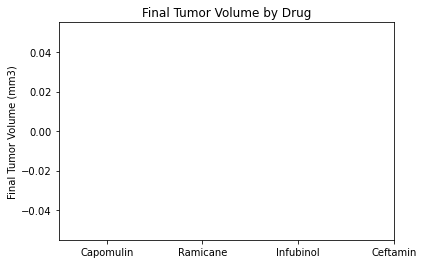

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# Edit outliers on boxplot for visibility
flierprops = dict(marker='o', markerfacecolor='r', markersize=8, markeredgecolor='black')

# Plot boxplot
plt.boxplot(tumor_vol_data, flierprops=flierprops)

# Add title and labels to boxplot
plt.title('Final Tumor Volume by Drug')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.show()

## Line and Scatter Plots

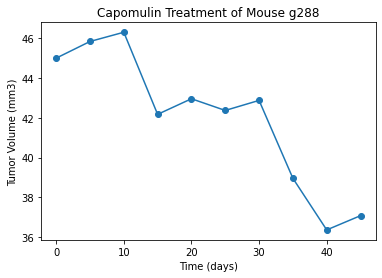

In [19]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Identify data points of a mouse treated with Capomulin
# find mice treated with Capomulin
Capomulin = study_df_clean.loc[study_df_clean['Drug Regimen'] == 'Capomulin']
Capomulin["Mouse ID"].unique()
# narrow down to one mouse
mouse = study_df_clean.loc[study_df_clean['Mouse ID'] == 'g288']

# Plot a line chart with the time values on the x-axis and the tumor volume values on the y-axis
# marker = 'o' adds circles on each data point for visibility
plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'], marker = 'o')

# Add labels and title to plot
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse g288")

# Display plot
plt.show()

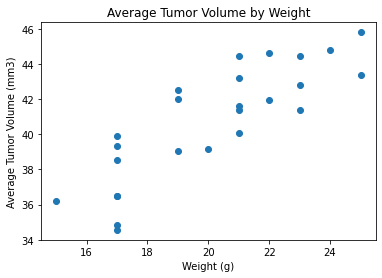

In [20]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Find average tumor volume for each mouse

avg_vol_df = pd.DataFrame(Capomulin.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})

# Merge average tumor volume with Capomulin and drop duplicates
avg_vol_df = pd.merge(Capomulin, avg_vol_df, on='Mouse ID')
final_avg_vol_df = avg_vol_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
final_avg_vol_df

x = final_avg_vol_df['Weight (g)']
y = final_avg_vol_df['avg_tumor_vol']

# Create a scatter plot based on new dataframe above with circle markers and listed colors
plt.scatter(x, y)

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
# Display plot
plt.show()

## Correlation and Regression

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
# calculate correlation
print(f"""The correlation between weight and average tumor volume
on the Capomulin regimen is {round(st.pearsonr(x,y)[0],2)}.""")

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on top of scatter plot
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

# Annotate linear regression
plt.annotate(line_eq,(20,37),fontsize=15,color="red")

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
plt.show()


The correlation between weight and average tumor volume
on the Capomulin regimen is 0.84.


NameError: name 'linregress' is not defined